In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../../ML_Data/FINAL_SPECIES_RAW.csv")
df

,Sample_ID,Age,Epigenetic_deviation,BMI,Group,Race_1.0,Race_2.0,Race_3.0,Race_4.0,Sex_1.0,...,s__uncultured_Allobaculum_sp.,s__Thiobacillus_unclassified,s__Paracoccus_sp._G200V,s__Methylophilus_unclassified,s__SM2D12_unclassified,s__Paracoccus_limosus,s__Candidatus_Arthromitus_unclassified,s__Rothia_sp._MYI-52,s__Candidatus_Soleaferrea_unclassified,s__uncultured_Micrococcus_sp.
0,80004,87.961644,1.582379,17.545506,Worse,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80001,87.561644,-17.008019,23.871528,Better,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80020,89.000000,-7.461716,25.778835,Worse,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80007,86.460274,-12.790208,27.038133,Better,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,80019,89.013699,-7.160825,23.262468,Worse,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,43327,86.816438,-6.386774,29.299593,Worse,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,47170,86.923288,-6.246294,20.115458,Worse,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
308,5703,89.712329,-12.695643,19.223376,Better,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
309,14654,89.295890,-12.169833,29.927159,Better,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
#get same subset as alpha diversity cohort
reference = pd.read_csv("../../Linux/cleaned_filtered_asv_df.csv")
ids = reference["Sample_ID"]
df = df[df["Sample_ID"].isin(ids)]

In [29]:
import pandas as pd

# Extract the metadata and species data
metadata_cols = ['Sample_ID', 'Age', 'Epigenetic_deviation', 'BMI', 'Group']  # Add other metadata columns if needed
species_cols = [col for col in df.iloc[:,15:].columns]

# Calculate relative abundance by row (sample)
df[species_cols] = df[species_cols].div(df[species_cols].sum(axis=1), axis=0) * 100

# Average relative abundance per group
mean_abundance = df.groupby('Group')[species_cols].mean().reset_index()


C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_24956\2961486852.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[species_cols] = df[species_cols].div(df[species_cols].sum(axis=1), axis=0) * 100


In [30]:
# Melt the DataFrame for plotting
plot_data = mean_abundance.melt(id_vars='Group', var_name='Species', value_name='Abundance')


C:\Users\MEDV3721\AppData\Local\Temp\ipykernel_24956\2428620821.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(custom_labels, rotation=0, fontsize=20)


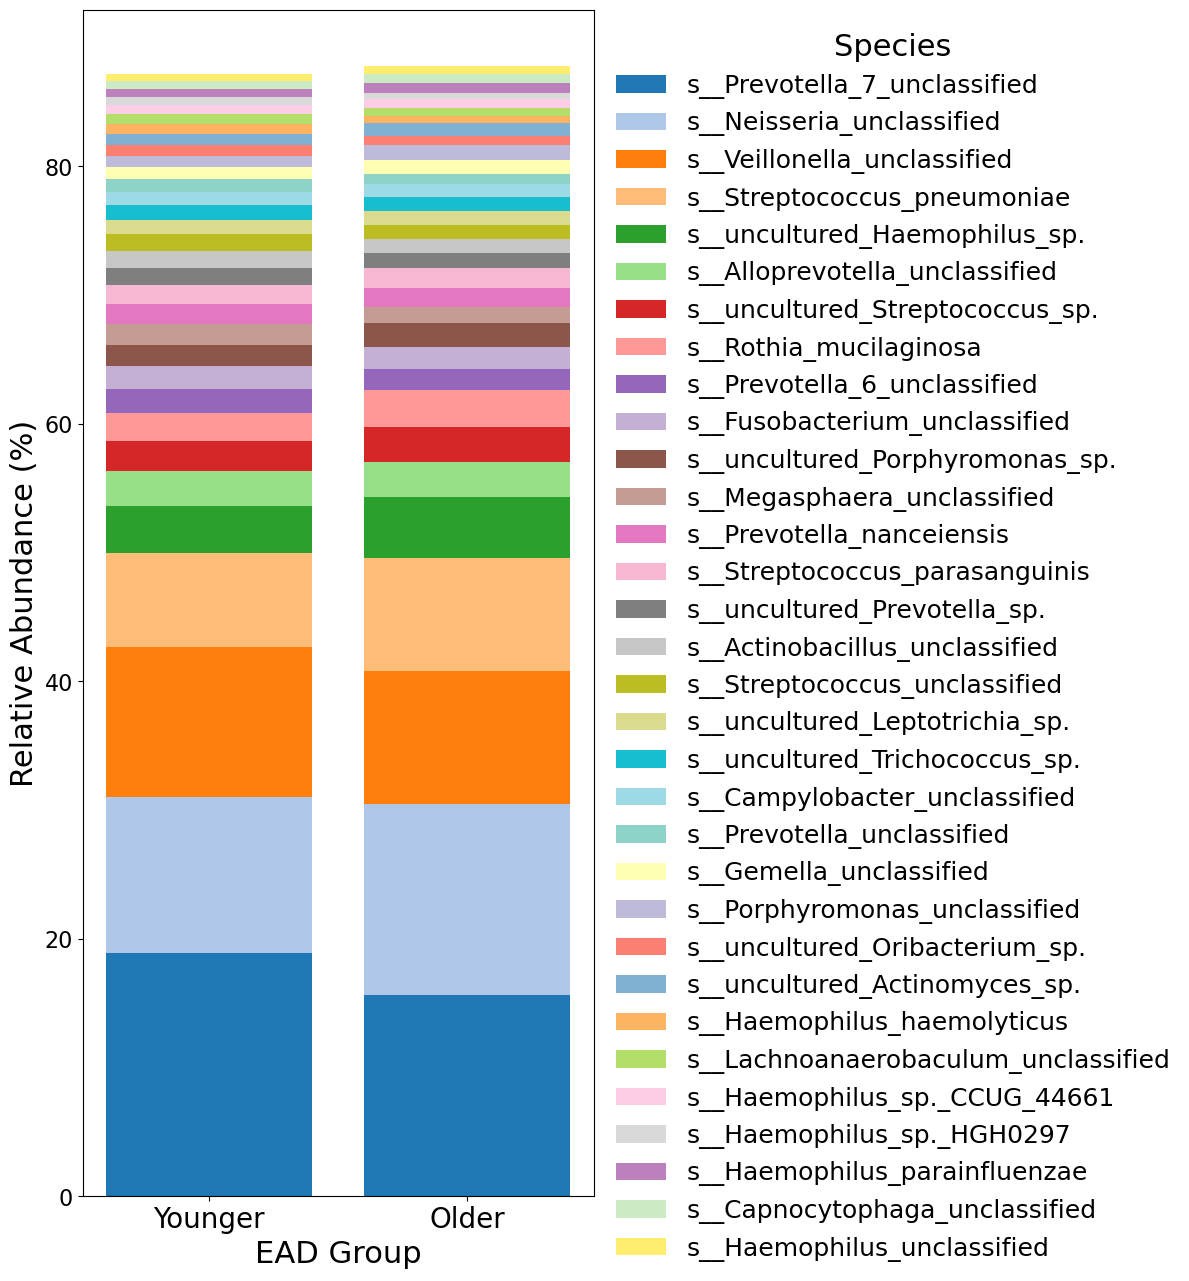

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Average relative abundance per group
mean_abundance = df.groupby('Group')[species_cols].mean().reset_index()

# Transpose the DataFrame to have species as rows, with groups as columns
mean_abundance.set_index('Group', inplace=True)
mean_abundance = mean_abundance.T

# Identify the top 30 most abundant species for each group
top_species_groups = set()
for group in mean_abundance.columns:
    top_species = mean_abundance[group].nlargest(30).index
    top_species_groups.update(top_species)

# Convert set to list for indexing
top_species_groups = list(top_species_groups)

# Filter the DataFrame to keep only the union of the top species for each group
mean_abundance_top_30 = mean_abundance.loc[top_species_groups]

# Sort species by abundance within each group
sorted_species = []
for group in mean_abundance_top_30.columns:
    sorted_species_group = mean_abundance_top_30[group].sort_values(ascending=False).index
    sorted_species.extend([species for species in sorted_species_group if species not in sorted_species])

# Reorder DataFrame to align species in descending order by abundance within each group
mean_abundance_top_30 = mean_abundance_top_30.loc[sorted_species]

# Create a distinct color palette by combining multiple palettes
base_palette = sns.color_palette("tab20", 20) + sns.color_palette("Set3", 12) + sns.color_palette("Paired", 12)
num_species = len(mean_abundance_top_30.index)

# If there are more species than colors in the palette, repeat colors (this is a fallback)
if num_species > len(base_palette):
    base_palette = (base_palette * ((num_species // len(base_palette)) + 1))[:num_species]

# Assign a unique color to each species
species_colors = {species: base_palette[i] for i, species in enumerate(mean_abundance_top_30.index)}

# Plot stacked bar chart with distinct colors for each species
fig, ax = plt.subplots(figsize=(12, 14))
bottom = np.zeros(len(mean_abundance_top_30.columns))

for species in mean_abundance_top_30.index:
    ax.bar(
        mean_abundance_top_30.columns,
        mean_abundance_top_30.loc[species],
        label=species,
        bottom=bottom,
        color=species_colors[species]
    )
    bottom += mean_abundance_top_30.loc[species]

# Customize the plot for publication
plt.ylabel("Relative Abundance (%)", fontsize=22)
plt.xlabel("EAD Group", fontsize=22)

# Define custom x-axis labels
custom_labels = ["Younger", "Older"]
ax.set_xticklabels(custom_labels, rotation=0, fontsize=20)

plt.yticks(fontsize=16)

# Customize the legend
ax.legend(title='Species', bbox_to_anchor=(1.0, 1), loc='upper left', title_fontsize=22, fontsize=18, ncol=1)

# Remove the frame around the legend for a cleaner look
legend = ax.get_legend()
legend.get_frame().set_linewidth(0.0)

# Adjust layout for spacing
plt.tight_layout()

# Save the figure with high DPI for publication quality
plt.savefig("top_30_barplot.png", format='png', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()
